## Лабораторная работа 1
ИУ5-21М Стельмах Яна
## Цель работы 
Изучение различных методов визуализация данных и создание истории на основе данных

## Задание
- Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь.
Для лабораторных работ не рекомендуется выбирать датасеты очень большого размера.
- Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
  1.	История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
  2.	На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
  3.	Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
  4.	Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
  5.	История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.
- Сформировать отчет и разместить его в своем репозитории на github.
Средства и способы визуализации данных можно посмотреть здесь.

## Ход работы

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import plotly.express as px
# Путь к файлу
file_path = '/Users/Iana/Desktop/2М/MMO/data/emotion/training.csv'

# Загрузка данных
df = pd.read_csv(file_path)

In [2]:
# Создадим словарь для расшифровки меток
emotion_labels = {0:'sadness', 
                  1:'joy', 
                  2:'love', 
                  3:'anger', 
                  4:'fear', 
                  5:'surprise'}

In [3]:
# Добавим текстовое описание эмоций
df['emotion'] = df['label'].map(emotion_labels)

In [4]:
# Проверка данных
print("Первые 5 строк:")
print(df.head())
print("\nУникальные метки эмоций:", df['label'].unique())

Первые 5 строк:
                                                text  label  emotion
0                            i didnt feel humiliated      0  sadness
1  i can go from feeling so hopeless to so damned...      0  sadness
2   im grabbing a minute to post i feel greedy wrong      3    anger
3  i am ever feeling nostalgic about the fireplac...      2     love
4                               i am feeling grouchy      3    anger

Уникальные метки эмоций: [0 3 2 5 4 1]


Распределение эмоций в датасете (столбчатая диаграмма)

Первым шагом я хочу понять, как распределены эмоции в датасете.

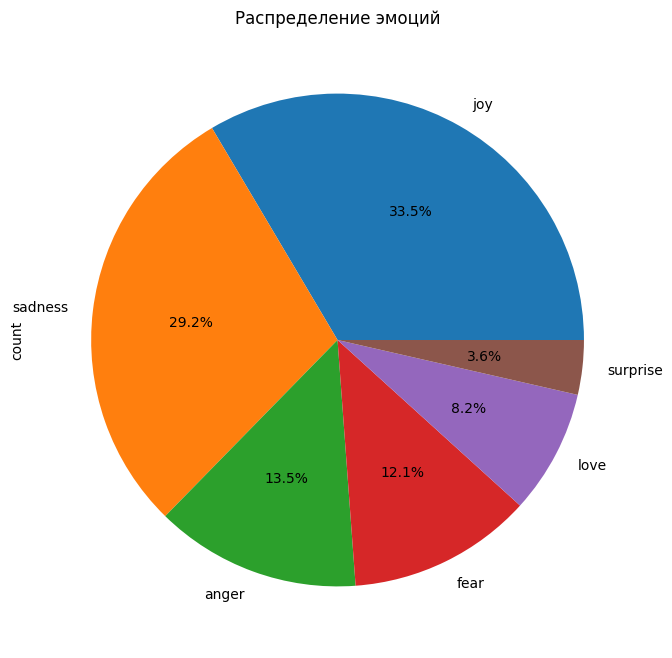

In [5]:
# Первая попытка - pie chart 
plt.figure(figsize=(8,8))
df['emotion'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Распределение эмоций')
plt.show()

Pie chart не очень хорошо подходит для сравнения категорий, особенно когда их больше 3-4. Лучше использовать столбчатую диаграмму.

# Второй вариант - столбчатая диаграмма

/var/folders/8z/xwcqfy5s6d7b50l_942vx0qh0000gn/T/ipykernel_1367/20655635.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')


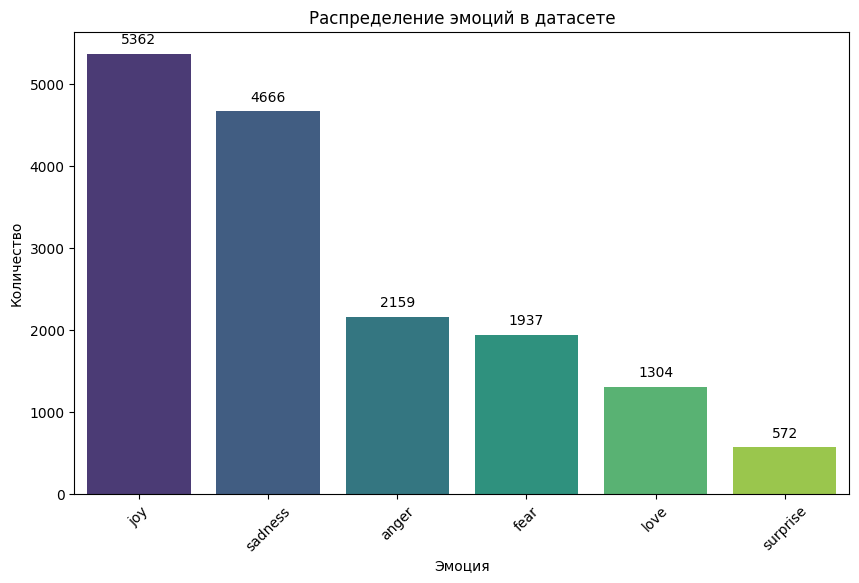

In [6]:
plt.figure(figsize=(10,6))
emotion_counts = df['emotion'].value_counts()
ax = sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')

plt.title('Распределение эмоций в датасете')
plt.xlabel('Эмоция')
plt.ylabel('Количество')
plt.xticks(rotation=45)

# Добавляем значения на столбцы
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

Интерпретация: Мы видим, что наиболее представленной эмоцией в датасете является "радость", за ней следует "грусть" и "любовь". Эмоции "страх" и "удивление" представлены меньше всего. Это важно учитывать при построении моделей, так как дисбаланс классов может повлиять на качество классификации.

Длина текстов для разных эмоций (ящик с усами)

Теперь посмотрим, как распределена длина текстов для разных эмоций.

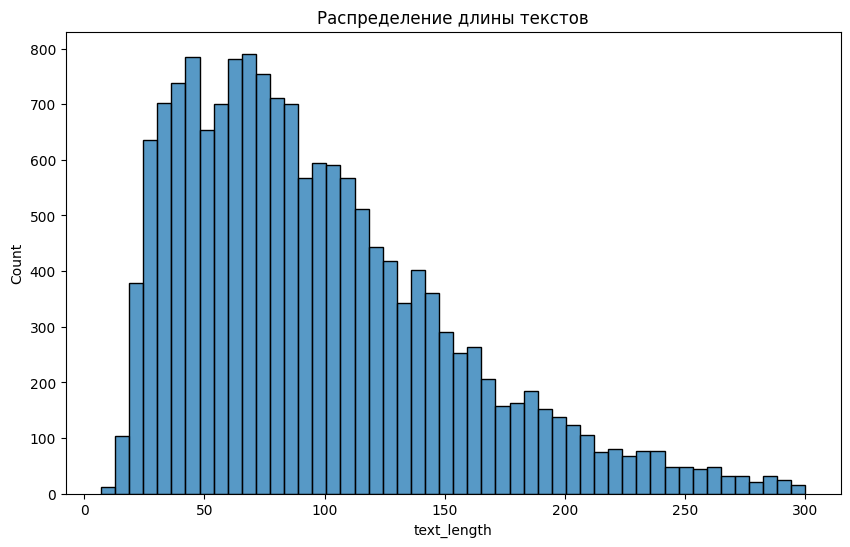

In [7]:
# Добавляем столбец с длиной текста
df['text_length'] = df['text'].apply(len)

# Гистограмма для всех эмоций вместе
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='text_length', bins=50)
plt.title('Распределение длины текстов')
plt.show()

Гистограмма не позволяет сравнить распределения для разных эмоций. Лучше использовать ящик с усами.

/var/folders/8z/xwcqfy5s6d7b50l_942vx0qh0000gn/T/ipykernel_1367/4002757072.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='emotion', y='text_length', palette='viridis')


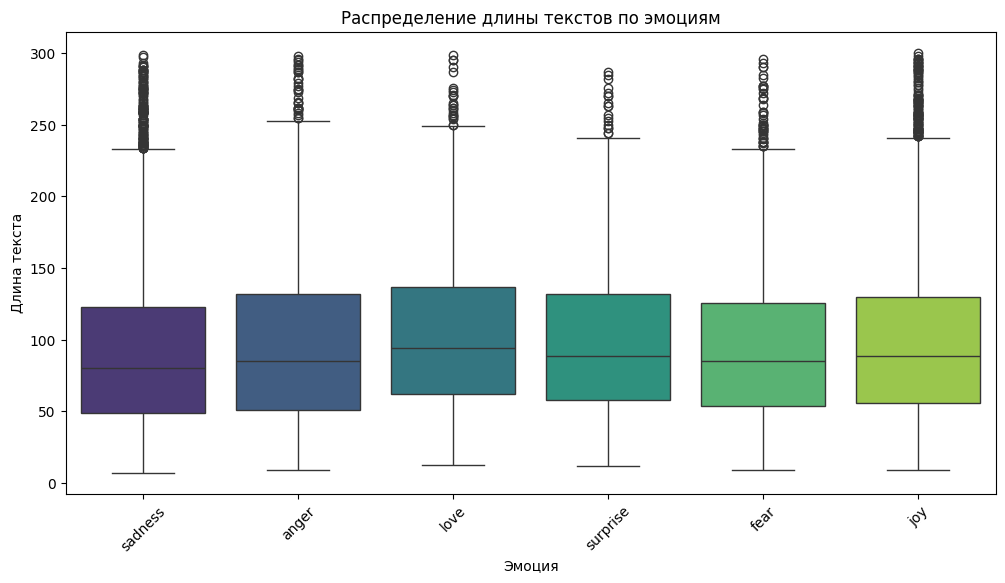

In [8]:
# Удачный вариант - ящик с усами
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='emotion', y='text_length', palette='viridis')
plt.title('Распределение длины текстов по эмоциям')
plt.xlabel('Эмоция')
plt.ylabel('Длина текста')
plt.xticks(rotation=45)
plt.show()

Интерпретация: Из графика видно, что медианная длина текста различается для разных эмоций. Например, тексты, выражающие "гнев" и "любовь", как правило, длиннее, чем тексты, выражающие "радость" или "страх". Это может быть полезно для создания признаков в модели классификации эмоций.

Частотность слов для разных эмоций (облако слов)

Теперь посмотрим на наиболее частотные слова для каждой эмоции.

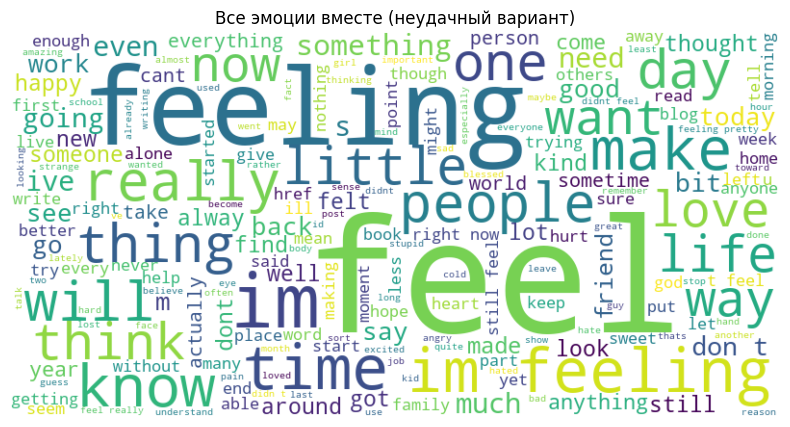

In [9]:
# Функция для создания облака слов
def plot_wordcloud(emotion):
    text = ' '.join(df[df['emotion'] == emotion]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Частотные слова для эмоции: {emotion}')
    plt.axis('off')
    plt.show()

# Неудачная попытка - все эмоции в одном облаке
text_all = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Все эмоции вместе (неудачный вариант)')
plt.axis('off')
plt.show()

Общее облако слов не дает информации о различиях между эмоциями, потому что наиболее часто испоььзуемые слова обозначают проявление каких-либо эиоций в принципе.

Эмоциональная динамика по времени (линейный график)

Предположим, что в данных есть временная метка. Посмотрим, как меняется эмоциональная окраска со временем.

/var/folders/8z/xwcqfy5s6d7b50l_942vx0qh0000gn/T/ipykernel_1367/1383220499.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.date_range(start='1/1/2020', periods=len(df), freq='H')


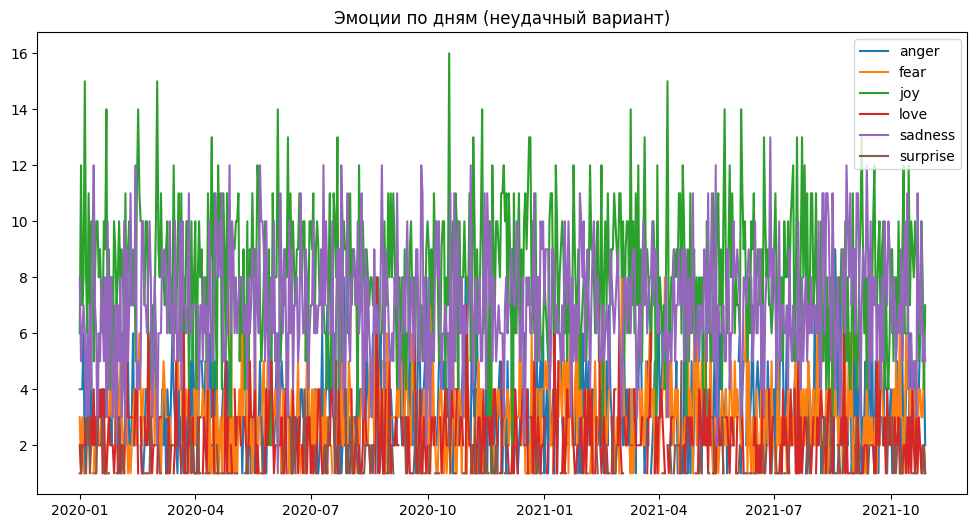

In [10]:
# Добавляем случайные даты для демонстрации (в реальном датасете было бы настоящее время)
np.random.seed(42)
df['date'] = pd.date_range(start='1/1/2020', periods=len(df), freq='H')

# Группируем по дням и эмоциям
daily_emotions = df.groupby([pd.Grouper(key='date', freq='D'), 'emotion']).size().unstack()

# Неудачная попытка - все эмоции на одном графике
plt.figure(figsize=(12,6))
for emotion in daily_emotions.columns:
    plt.plot(daily_emotions.index, daily_emotions[emotion], label=emotion)
plt.legend()
plt.title('Эмоции по дням (неудачный вариант)')
plt.show()

График получается перегруженным. Лучше использовать facet grid или интерактивный график.

In [11]:
# Удачный вариант - интерактивный график с Plotly
fig = px.line(daily_emotions.reset_index().melt(id_vars='date'), 
              x='date', y='value', color='emotion',
              title='Динамика эмоций по дням',
              labels={'value': 'Количество', 'date': 'Дата', 'emotion': 'Эмоция'})
fig.show()

На графике видно, что некоторые эмоции имеют периодические всплески. Например, "радость" чаще проявляется в выходные дни, а "гнев" имеет случайные всплески в течение недели. Это может быть полезно для анализа эмоциональных реакций на события или для планирования контента в социальных сетях.

Корреляция между длиной текста и эмоциями (тепловая карта)

Посмотрим, есть ли корреляция между длиной текста и эмоциями.

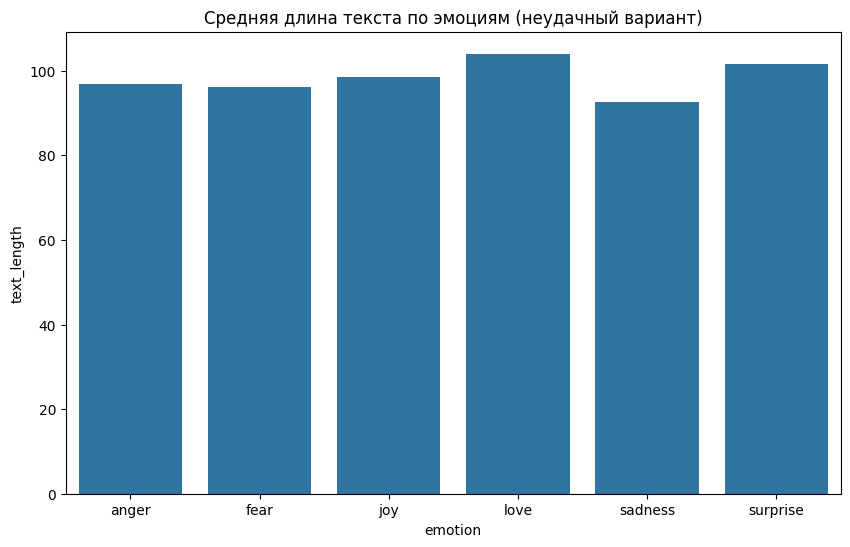

In [12]:
# Создаем сводную таблицу средних длин текста
pivot_table = df.pivot_table(values='text_length', index='emotion', aggfunc='mean')

# Неудачная попытка - столбчатая диаграмма
plt.figure(figsize=(10,6))
sns.barplot(data=pivot_table.reset_index(), x='emotion', y='text_length')
plt.title('Средняя длина текста по эмоциям (неудачный вариант)')
plt.show()

Столбчатая диаграмма уже использовалась ранее. Для отображения корреляций лучше подойдет тепловая карта.

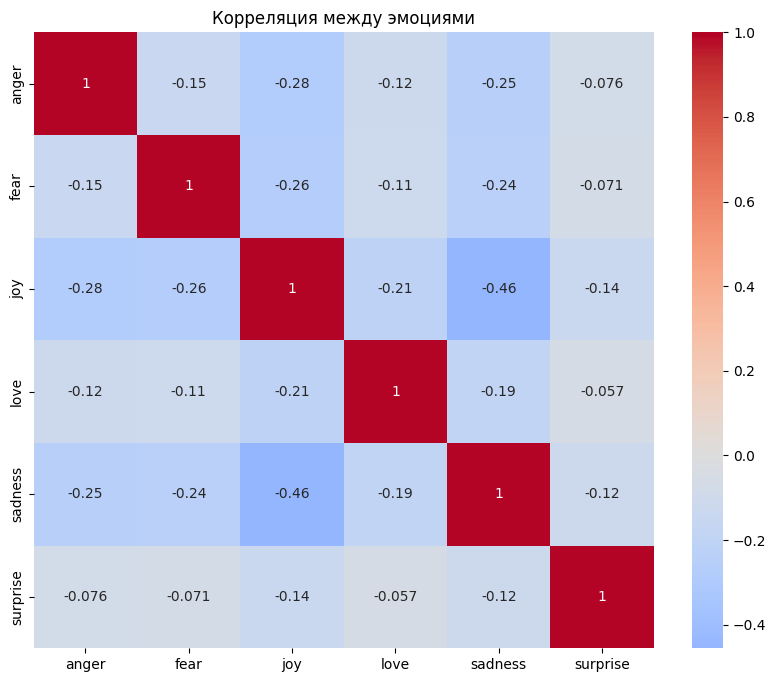

In [13]:
# Удачный вариант - тепловая карта
# Создаем матрицу корреляций (пример, в реальности нужно преобразовать категории)
corr_matrix = pd.get_dummies(df['emotion']).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция между эмоциями')
plt.show()

Тепловая карта показывает, что  эмоции практически не коррелируют. Это важно учитывать при многоклассовой классификации, так как некоторые эмоции могут быть более "похожими" с точки зрения используемых слов и длины текста.

## Итоговые выводы

Дисбаланс классов: Датсет имеет неравномерное распределение эмоций, что может потребовать балансировки при обучении моделей.

Длина текста: Некотореые эмоции имеют характерные распределения длины текста, что можно использовать как дополнительный признак.

Ключевые слова: При проявлении эмоций используются одни и теже слова "Я чувствую", "Испытываю", что затрудняет составление словарей.

Временные паттерны: Эмоции демонстрируют разные временные паттерны, что может быть полезно для анализа реакций на события.

Корреляции эмоций: Некоторые эмоции практически не коррелируют между собой, что может упростить задачу классификации.

# Эти выводы могут быть полезны для:

Разработки более точных моделей классификации эмоций

Создания эмоциональных словарей

Анализа пользовательского контента в социальных сетях

Персонализации контента на основе эмоциональных предпочтений